
## This workbook will explore the "Flights Dataset" and predicts delayed flights at airports located in the United States bases on previous flight records. The dataset consists of flight information such as arrival and departure times.
https://www.kaggle.com/code/ioannistr/visualizing-us-flight-data/input?select=2008.csv

## Spark is utilized to explore, analyze and visualize the results. This dataset examines flights in 2008 which is roughly 7 million flights! Apache Spark will be utilized to analyze this dataset.

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns


Exploratory Data Analysis

In [0]:
spark = SparkSession.builder.appName("FlightDelayPredictionEDA").getOrCreate()

In [0]:
df = spark.read.csv("dbfs:/FileStore/shared_uploads/venkatl1@umbc.edu/2008-1.csv", header=True, inferSchema=True)

In [0]:
df.show(5)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2008|    1|         3|        4|   2003|      1955|   2211|      2225|           WN|      335

In [0]:
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- Car

In [0]:
pandas_df = df.toPandas()

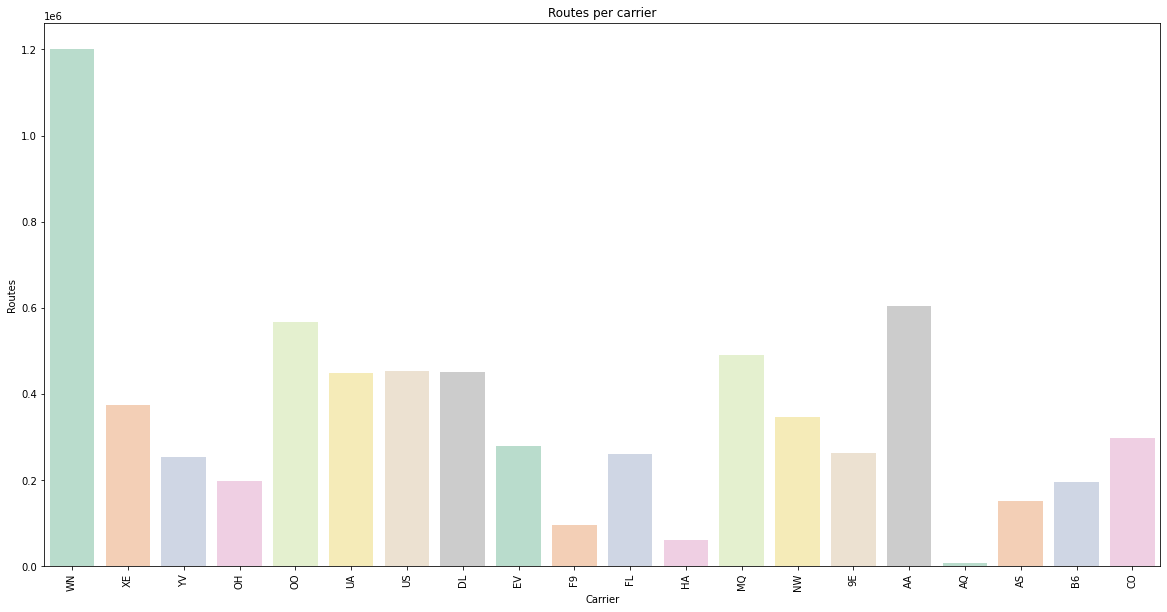

In [0]:
import seaborn as sns
sns.countplot(x='UniqueCarrier', palette="Pastel2", data=pandas_df)
plt.gcf().set_size_inches(20,10)
plt.title('Routes per carrier')
plt.xlabel('Carrier')
plt.xticks(rotation='vertical')
plt.ylabel('Routes')
plt.show()

Based on the chart we can say that Southwest Airlines has the highest number of routes and Aloha has lowest number of routes.


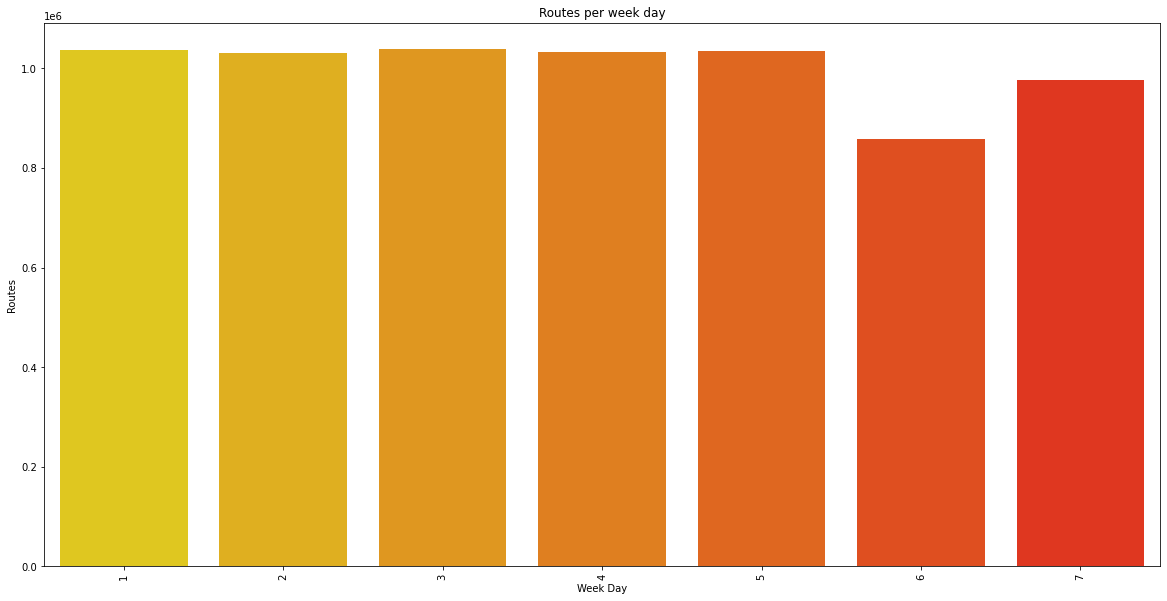

In [0]:
sns.countplot(x='DayOfWeek', palette="autumn_r", data=pandas_df)
plt.gcf().set_size_inches(20,10)
plt.title('Routes per week day')
plt.xlabel('Week Day')
plt.xticks(rotation='vertical')
plt.ylabel('Routes')
plt.show()

Based on the chart we can say that Both Monday and Wednesday has the highest number of routes and Saturday has lowest number of routes.


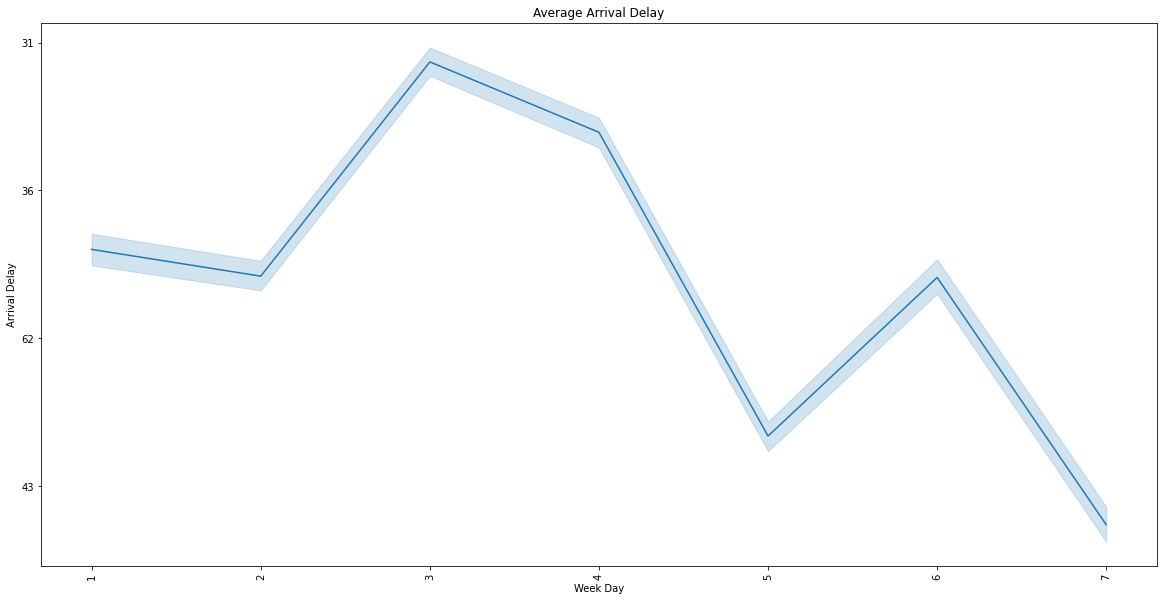

In [0]:
sns.lineplot(data=pandas_df, x = pandas_df['DayOfWeek'], y = pandas_df['ArrDelay'])
plt.gcf().set_size_inches(20,10)
plt.title('Average Arrival Delay')
plt.xlabel('Week Day')
plt.xticks(rotation='vertical')
plt.ylabel('Arrival Delay')
plt.show()

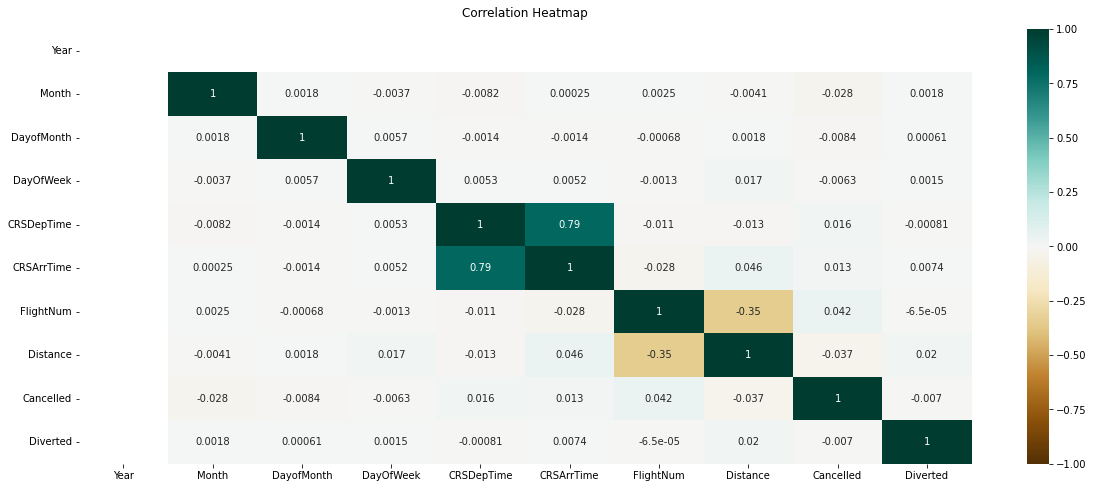

In [0]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(pandas_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Looking at the correlation matrix we can see that the CRSDepTime (departure time) it highly correlated to CRSArrTime, so the departure time might be the most indicative attribute of a flight delay.


In [0]:
import pandas as pd

In [0]:
pandas_df['ArrDelay'] = pd.to_numeric(pandas_df['ArrDelay'], errors='coerce')


In [0]:
pandas_df = pandas_df.dropna(subset=['ArrDelay'])


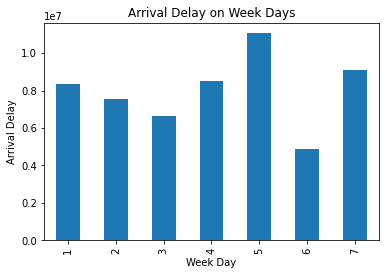

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


arr_delay = pandas_df.groupby('DayOfWeek')['ArrDelay'].sum().reset_index()

arr_delay.plot(x='DayOfWeek', y='ArrDelay', kind='bar', legend=False)

plt.xlabel("Week Day")
plt.ylabel("Arrival Delay")
plt.title("Arrival Delay on Week Days")
plt.show()


Based on the visualization we can say that there is a flights arrival delay more on 5th day of week


In [0]:
pandas_df['DepDelay'] = pd.to_numeric(pandas_df['DepDelay'], errors='coerce')


In [0]:
pandas_df = pandas_df.dropna(subset=['ArrDelay'])


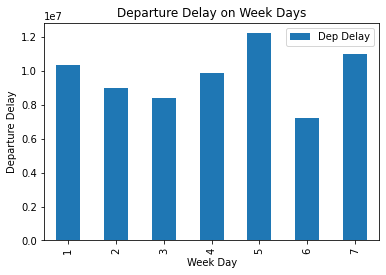

In [0]:
dep_delay= pandas_df.groupby('DayOfWeek').agg(
    sum_dep_delay = ('DepDelay','sum')
)
temp = pd.DataFrame({
    'Week Day': dep_delay.index,
    'Dep Delay' : dep_delay.sum_dep_delay.values
})
temp.plot(x='Week Day',kind='bar')
plt.xlabel("Week Day")
plt.ylabel("Departure Delay")
plt.title("Departure Delay on Week Days")
plt.show()

Based on the visualization we can say that there is a flights Departure delay more on 5th day of week.  


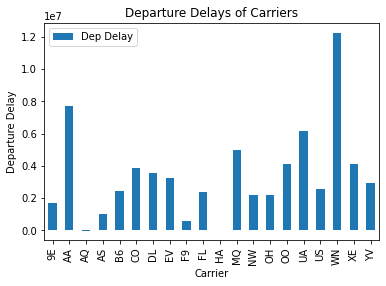

In [0]:
dep_delay= pandas_df.groupby('UniqueCarrier').agg(
    sum_dep_delay = ('DepDelay','sum')
)
temp = pd.DataFrame({
    'Carrier': dep_delay.index,
    'Dep Delay' : dep_delay.sum_dep_delay.values
})
temp.plot(x='Carrier',kind='bar')
plt.xlabel("Carrier")
plt.ylabel("Departure Delay")
plt.title("Departure Delays of Carriers")
plt.show()

Based on the visualization we can say that when we compare flights Departure delay based on carriers there is more delay in Carrier- ‘WN (South West)’There is less delay in Carrier-’HA(Hawaiian Airlines)’


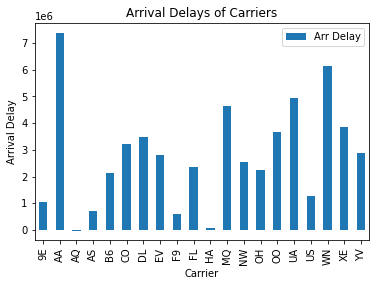

In [0]:
arr_delay= pandas_df.groupby('UniqueCarrier').agg(
    sum_arr_delay = ('ArrDelay','sum')
)
temp = pd.DataFrame({
    'Carrier': arr_delay.index,
    'Arr Delay' : arr_delay.sum_arr_delay.values
})
temp.plot(x='Carrier',kind='bar')
plt.xlabel("Carrier")
plt.ylabel("Arrival Delay")
plt.title("Arrival Delays of Carriers")
plt.show()

Based on the visualization we can say that when we compare flights arrival delay based on carriers.There is more delay in Carrier - ‘AA (American Airlines)’ There is less delay in Carrier-’HA (Hawaiian Airlines)’


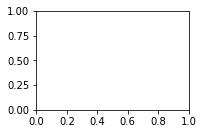

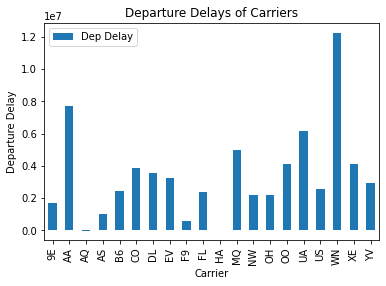

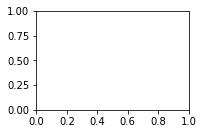

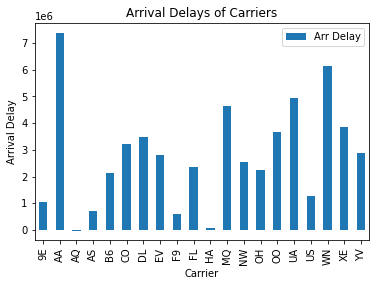

In [0]:

dep_delay= pandas_df.groupby('UniqueCarrier').agg(
    sum_dep_delay = ('DepDelay','sum')
)
temp = pd.DataFrame({
    'Carrier': dep_delay.index,
    'Dep Delay' : dep_delay.sum_dep_delay.values
})

plt.subplot(2,2,1)
temp.plot(x='Carrier',kind='bar')
plt.xlabel("Carrier")
plt.ylabel("Departure Delay")
plt.title("Departure Delays of Carriers")
plt.show()

arr_delay= pandas_df.groupby('UniqueCarrier').agg(
    sum_arr_delay = ('ArrDelay','sum')
)
temp = pd.DataFrame({
    'Carrier': arr_delay.index,
    'Arr Delay' : arr_delay.sum_arr_delay.values
})
plt.subplot(2,2,2)
temp.plot(x='Carrier',kind='bar')
plt.xlabel("Carrier")
plt.ylabel("Arrival Delay")
plt.title("Arrival Delays of Carriers")
plt.show()

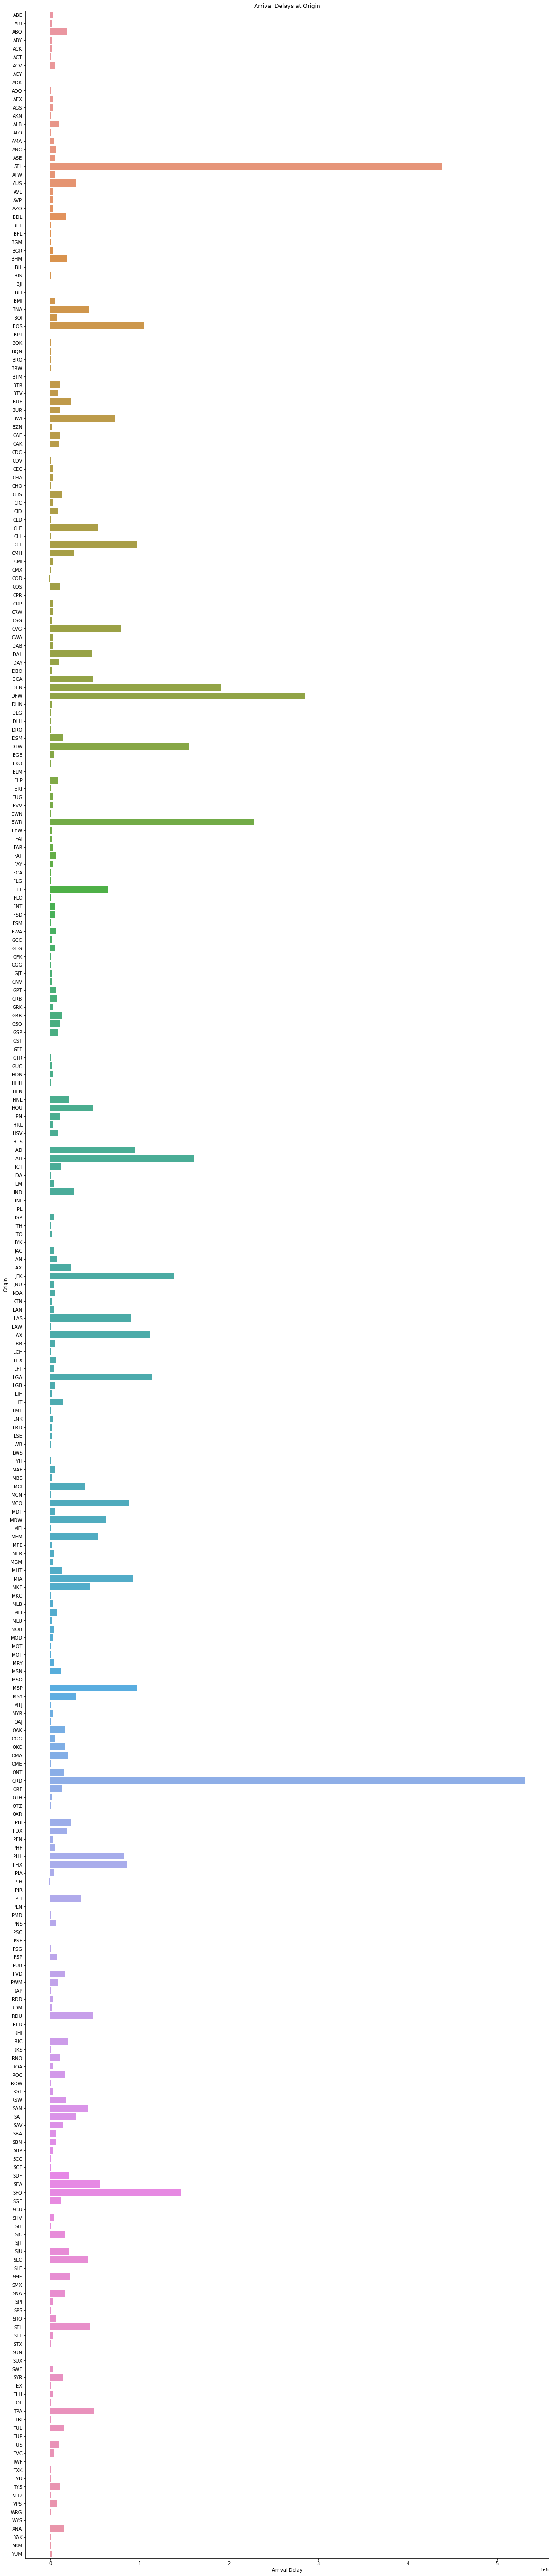

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


arr_delay = pandas_df.groupby('Origin').agg(
    sum_arr_delay=('ArrDelay', 'sum')
).reset_index()

plt.figure(figsize=(20, 100))

sns.barplot(x='sum_arr_delay', y='Origin', data=arr_delay, ci=None)

plt.xlabel("Arrival Delay")
plt.ylabel("Origin")
plt.title("Arrival Delays at Origin")

plt.show()


In [0]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.mllib.regression import LabeledPoint
from pyspark.sql.functions import udf
from pyspark.mllib.linalg import Vectors
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.param import Param, Params
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.stat import Statistics
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from IPython.display import display
from ipywidgets import interact
import sys
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import os.path
%matplotlib inline

In [0]:
textFile = sc.textFile('dbfs:/FileStore/shared_uploads/venkatl1@umbc.edu/2008-1.csv')


In [0]:
textFileRDD = textFile.map(lambda x: x.split(','))
header = textFileRDD.first()

textRDD = textFileRDD.filter(lambda r: r != header)

In [0]:
from pyspark.sql import Row

def parse(header, r):
    try:
        x = Row(
            Year=int(r[0]),
            Month=int(r[1]),
            DayofMonth=int(r[2]),
            DayOfWeek=int(r[3]),
            DepTime=int(float(r[4])),
            CRSDepTime=int(r[5]),
            ArrTime=int(float(r[6])),
            CRSArrTime=int(r[7]),
            UniqueCarrier=r[8],
            DepDelay=int(float(r[15])),
            Origin=r[16],
            Dest=r[17],
            Distance=int(float(r[18])),
            CarrierDelay=int(float(r[24])),
            WeatherDelay=int(float(r[25])),
            NASDelay=int(float(r[26])),
            SecurityDelay=int(float(r[27])),
            LateAircraftDelay=int(float(r[28]))
        )
    except:
        x = None
    return x

header = textRDD.first()  
rowRDD = textRDD.filter(lambda r: r != header).map(lambda r: parse(header, r)).filter(lambda r: r is not None)
airline_df = sqlContext.createDataFrame(rowRDD)


In [0]:
airline_df = airline_df.withColumn('DepDelayed', airline_df['DepDelay']>15)

In [0]:
def hour_ex(x): 
    h = int(str(int(x)).zfill(4)[:2])
    return h

f = udf(hour_ex, IntegerType())

airline_df = airline_df.withColumn('hour', f(airline_df.CRSDepTime))
airline_df.registerTempTable("airlineDF")

/databricks/spark/python/pyspark/sql/dataframe.py:234: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


### Exploration: What are the primary causes for flight delays

In [0]:
cause_delay = sqlContext.sql("SELECT sum(WeatherDelay) Weather,sum(NASDelay) NAS,sum(SecurityDelay) Security,sum(LateAircraftDelay) lateAircraft,sum(CarrierDelay) Carrier\
                              FROM airlineDF ")

In [0]:
df_cause_delay = cause_delay.toPandas()

In [0]:
df_cause_delay.head()

,Weather,NAS,Security,lateAircraft,Carrier
0,4633717,26171501,114316,31670242,24048217


Weather: Delays caused by adverse weather conditions, such as storms, snow, or fog.

NAS (National Air System): Delays caused by issues within the broader air transportation system, such as air traffic control congestion, airport operations, etc.

Security: Delays caused by security-related issues, such as heightened security measures, inspections, or security incidents.

Late Aircraft: Delays caused by the late arrival of an aircraft from a previous flight.

Carrier: Delays caused by issues related to the airline carrier, such as maintenance problems, crew scheduling, or other airline-specific operational challenges.



### Exploration: Which Airports have the Most Delays?

In [0]:
groupedDelay = sqlContext.sql("SELECT Origin, count(*) conFlight,avg(DepDelay) delay \
                                FROM airlineDF \
                                GROUP BY Origin")

df_origin = groupedDelay.toPandas()

In [0]:
df_origin.sort_values('delay',ascending=0).head()

,Origin,conFlight,delay
230,ACY,14,144.142857
154,CMX,35,110.342857
302,PIR,1,99.000000
234,PLN,22,86.909091
158,SPI,338,85.928994


Based on the results we can say that ACY Airport-(Atlantic City International Airport) has most delay with an average of 144 minutes. 


### Exploration: Which Airports have highest average departure delays?

In [0]:
highest_avg_delay_airports = sqlContext.sql("SELECT Origin, count(*) AS conFlight, avg(DepDelay) AS delay \
                                            FROM airlineDF \
                                            GROUP BY Origin \
                                            ORDER BY delay DESC")

df_highest_avg_delay = highest_avg_delay_airports.toPandas()
print(df_highest_avg_delay.head())


  Origin  conFlight       delay
0    ACY         14  144.142857
1    CMX         35  110.342857
2    PIR          1   99.000000
3    PLN         22   86.909091
4    SPI        338   85.928994


Based on the results we can say that ACY Airport-(Atlantic City International Airport) has most delay with an average of 144 minutes.


### What is the total number of flights and average delay for each destination airport?

In [0]:
destination_delay = sqlContext.sql("SELECT Dest, count(*) AS conFlight, avg(DepDelay) AS delay \
                                    FROM airlineDF \
                                    GROUP BY Dest")

df_destination_delay = destination_delay.toPandas()
print(df_destination_delay.head())


  Dest  conFlight      delay
0  BGM        119  52.579832
1  PSE        167  53.592814
2  MSY       8166  45.835905
3  GEG       3300  39.934545
4  BUR       5382  45.143813


Based on the results we can say that MSY Airport-(Louis Armstrong New Orleans Airport) has highest count of flights in destination airport with an average of 46 minutes.delay


### Which airline has the most delays?


In [0]:
airline_delays = sqlContext.sql("SELECT UniqueCarrier, count(*) AS conFlight, avg(DepDelay) AS delay \
                                FROM airlineDF \
                                GROUP BY UniqueCarrier \
                                ORDER BY delay DESC")

df_airline_delays = airline_delays.toPandas()
print(df_airline_delays.head())


  UniqueCarrier  conFlight      delay
0            YV      59150  58.662265
1            B6      49223  55.955549
2            UA     116072  55.046118
3            EV      66558  54.278389
4            XE      87883  53.720299


Based on the chart we can say that Southwest Airlines has the highest number of delays  and Aloha airlines has lowest number of delays.


### What is the distribution of delays for a specific airport?


In [0]:
specific_airport_delay = sqlContext.sql("SELECT Origin, DepDelay \
                                         FROM airlineDF \
                                         WHERE Origin = 'JFK'")

df_specific_airport_delay = specific_airport_delay.toPandas()
print(df_specific_airport_delay.head())


  Origin  DepDelay
0    JFK         0
1    JFK         0
2    JFK        46
3    JFK        25
4    JFK        15


###  How does the delay vary across months?


In [0]:
monthly_delay = sqlContext.sql("SELECT Month, count(*) AS conFlight, avg(DepDelay) AS delay \
                               FROM airlineDF \
                               GROUP BY Month")

df_monthly_delay = monthly_delay.toPandas()
print(df_monthly_delay.head())


   Month  conFlight      delay
0      1     148807  47.709039
1      2     156237  48.987218
2      3     157370  48.537440
3      4     122169  44.206223
4      5     120126  43.179561


## Visualizations for above questions

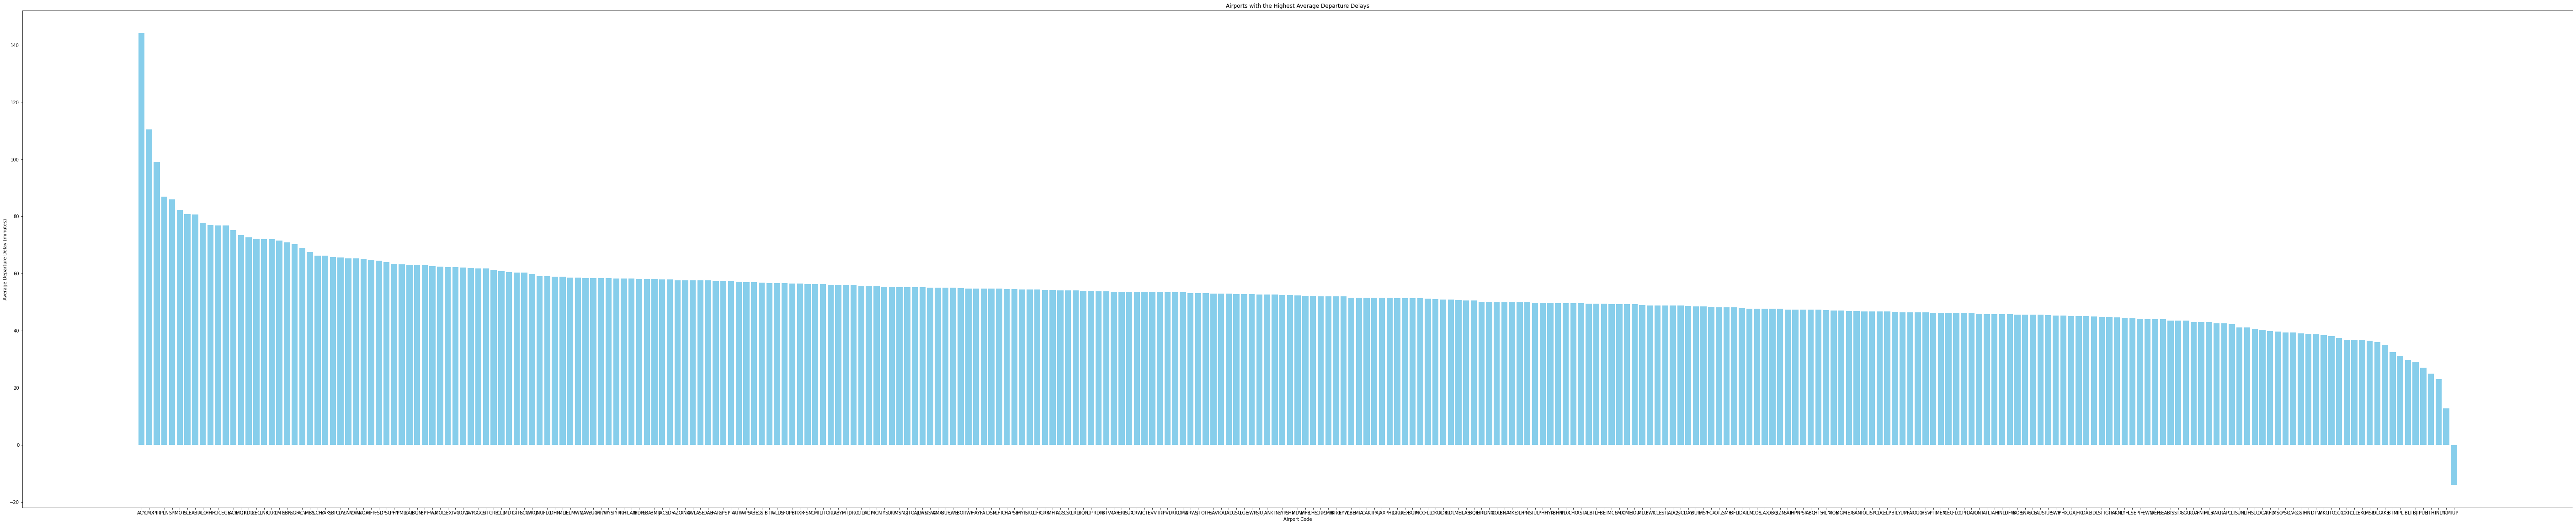

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 20))
plt.bar(df_highest_avg_delay['Origin'], df_highest_avg_delay['delay'], color='skyblue')
plt.title('Airports with the Highest Average Departure Delays')
plt.xlabel('Airport Code')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()


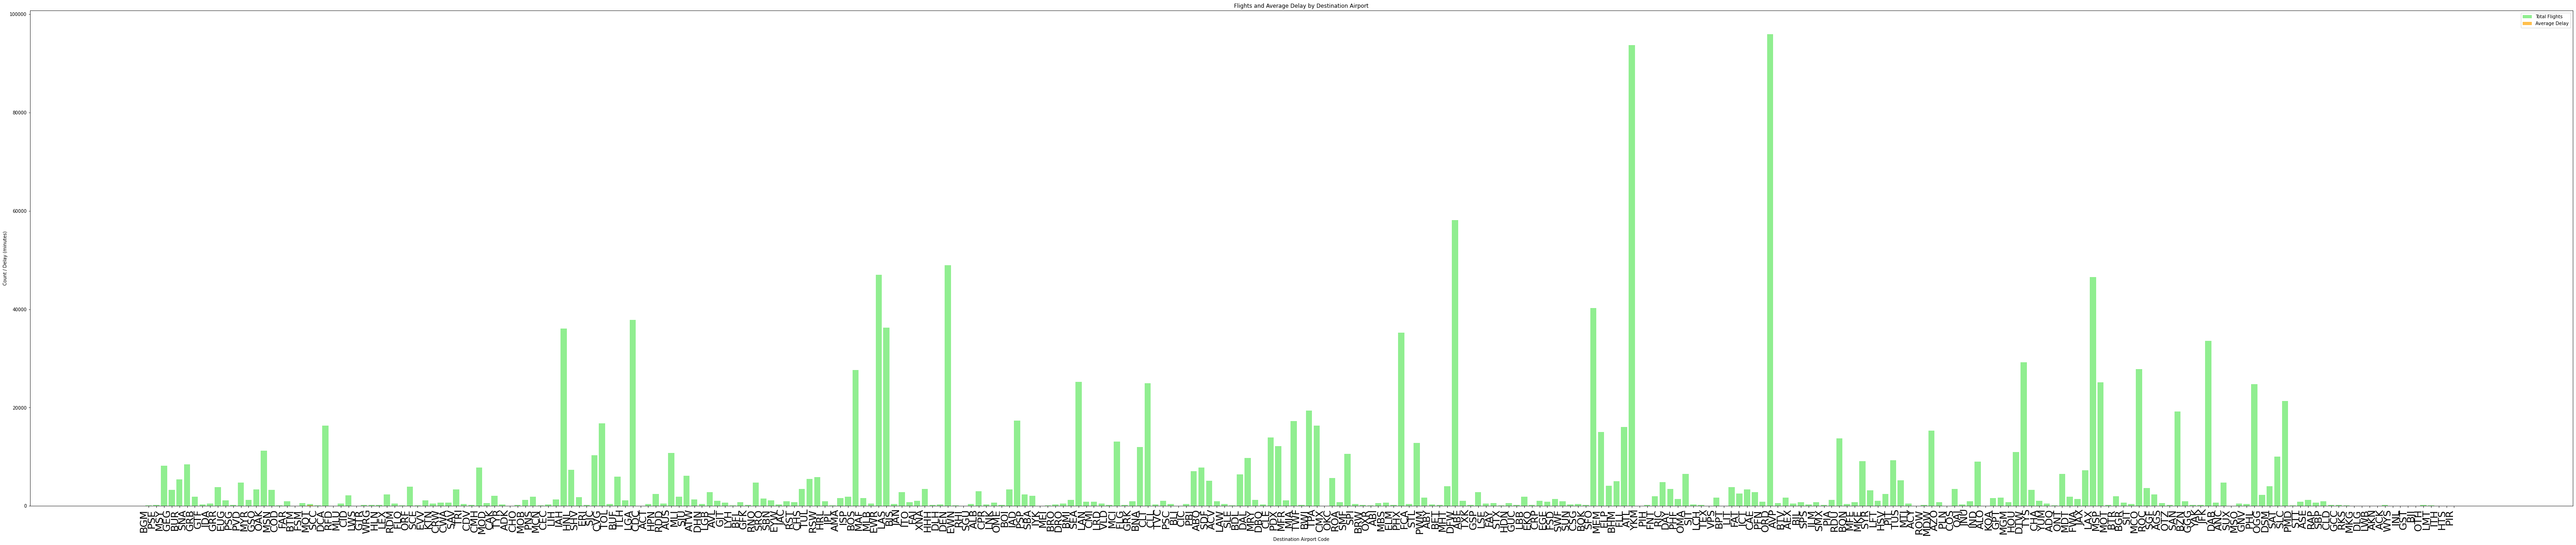

In [0]:
plt.figure(figsize=(100, 20))
plt.bar(df_destination_delay['Dest'], df_destination_delay['conFlight'], label='Total Flights', color='lightgreen')
plt.bar(df_destination_delay['Dest'], df_destination_delay['delay'], label='Average Delay', color='orange', alpha=0.7)
plt.title('Flights and Average Delay by Destination Airport')
plt.xlabel('Destination Airport Code')
plt.ylabel('Count / Delay (minutes)')
plt.legend()
plt.xticks(rotation=90, ha='right', fontsize=22)  
plt.show()


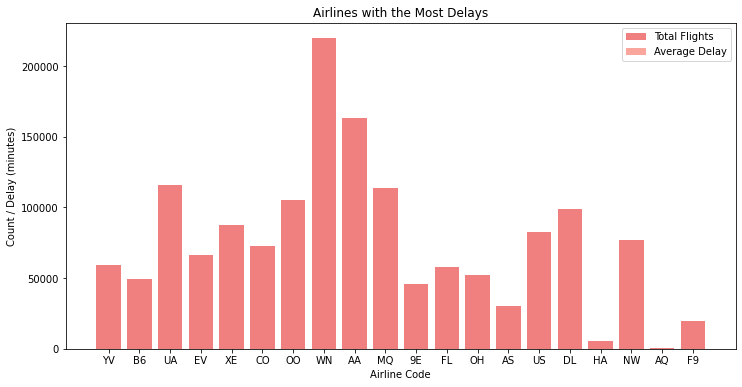

In [0]:
plt.figure(figsize=(12, 6))
plt.bar(df_airline_delays['UniqueCarrier'], df_airline_delays['conFlight'], label='Total Flights', color='lightcoral')
plt.bar(df_airline_delays['UniqueCarrier'], df_airline_delays['delay'], label='Average Delay', color='salmon', alpha=0.7)
plt.title('Airlines with the Most Delays')
plt.xlabel('Airline Code')
plt.ylabel('Count / Delay (minutes)')
plt.legend()
plt.show()


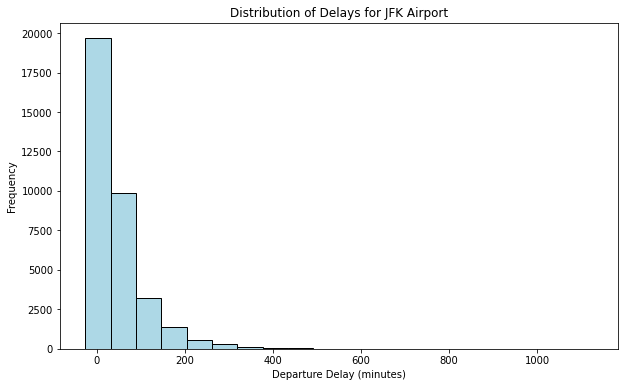

In [0]:
plt.figure(figsize=(10, 6))
plt.hist(df_specific_airport_delay['DepDelay'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Delays for JFK Airport')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


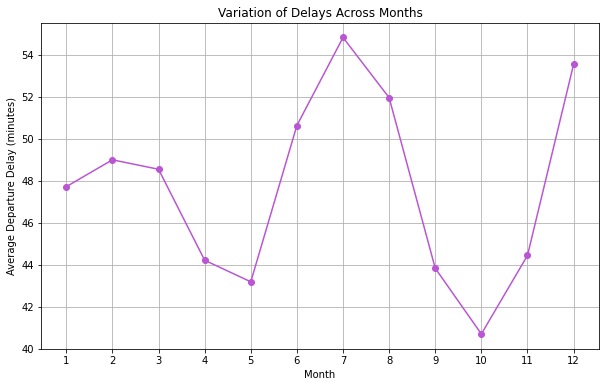

In [0]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_delay['Month'], df_monthly_delay['delay'], marker='o', linestyle='-', color='mediumorchid')
plt.title('Variation of Delays Across Months')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(df_monthly_delay['Month'])
plt.grid(True)
plt.show()


 Based on the chart we can say that delays are varied across months where, in month of July we can see more delays and less delays in october month


### predictions using machine learning algorithm

In [0]:
bd = sqlContext.read.format(
    "com.databricks.spark.csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/venkatl1@umbc.edu/2008-1.csv", 
    inferSchema=True)

In [0]:
bd1 = bd.filter((bd.Cancelled == 0)&(bd.Diverted == 0))
bd1.count()

Out[50]: 6855029

In [0]:
bd1 = bd1.withColumn('Delayed', (bd.ArrDelay >=15).cast('int')) 

sqlContext.registerDataFrameAsTable(bd1, "bd1")

bd1 = sqlContext.sql("select *, case \
               when CRSDepTime <= 800 then 1 \
               when 800 < CRSDepTime and CRSDepTime <= 1200 then 2 \
               when 1200 < CRSDepTime and CRSDepTime <= 1600 then 3 \
               when 1600 < CRSDepTime and CRSDepTime <= 2100 then 4 \
               else 1 end as TimeSlot \
               from bd1")

In [0]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol='UniqueCarrier',outputCol='IndexUniqueCarrier') 
bd2=indexer.fit(bd1).transform(bd1)

bd2.groupBy('UniqueCarrier','IndexUniqueCarrier').count().sort('IndexUniqueCarrier').show()

+-------------+------------------+-------+
|UniqueCarrier|IndexUniqueCarrier|  count|
+-------------+------------------+-------+
|           WN|               0.0|1186911|
|           AA|               1.0| 585485|
|           OO|               2.0| 553412|
|           MQ|               3.0| 471161|
|           US|               4.0| 446086|
|           DL|               5.0| 443934|
|           UA|               6.0| 437979|
|           XE|               7.0| 363414|
|           NW|               8.0| 344110|
|           CO|               9.0| 293855|
|           EV|              10.0| 274867|
|           FL|              11.0| 258713|
|           9E|              12.0| 254322|
|           YV|              13.0| 245131|
|           B6|              14.0| 192114|
|           OH|              15.0| 190695|
|           AS|              16.0| 148492|
|           F9|              17.0|  95384|
|           HA|              18.0|  61212|
|           AQ|              19.0|   7752|
+----------

In [0]:
bd3=bd2.select('DepDelay',
             'Distance', 
             'DayOfWeek',
             'IndexUniqueCarrier', 
             'TimeSlot',
             'Delayed')
             
bd3.limit(10).toPandas()

,DepDelay,Distance,DayOfWeek,IndexUniqueCarrier,TimeSlot,Delayed
0,8,810,4,0.0,4,0
1,19,810,4,0.0,1,0
2,8,515,4,0.0,1,0
3,-4,515,4,0.0,2,0
4,34,515,4,0.0,4,1
5,25,688,4,0.0,4,0
6,67,1591,4,0.0,4,1
7,-1,1591,4,0.0,2,0
8,2,451,4,0.0,1,0
9,0,451,4,0.0,4,0


In [0]:
from pyspark.sql.functions import col

bd3 = bd3.withColumn('DepDelay', col('DepDelay').cast('double'))

from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.sql.functions import col

a1 = VectorAssembler(
    inputCols=['DepDelay', 'Distance', 'DayOfWeek', 'IndexUniqueCarrier', 'TimeSlot'],
    outputCol='features'
)

bd4 = a1.transform(bd3).select(col("Delayed").cast('double').alias("label"), 'features')
stringIndexer = StringIndexer(inputCol='label', outputCol='label2')
sI = stringIndexer.fit(bd4)
bd4 = sI.transform(bd4)
bd4 = bd4.select('label2', 'features')


In [0]:
(bd_train, bd_test) = bd4.randomSplit([0.7, 0.3],seed=123)
print('Train:',bd_train.count())
print('Test:',bd_test.count())

Train: 4796621
Test: 2058408


In [0]:
from pyspark.ml.classification import RandomForestClassifier
from time import time

start_time = time()

rf = RandomForestClassifier(labelCol="label2", 
     featuresCol="features", 
     numTrees=500,
     maxDepth=3, 
     seed=1,
     featureSubsetStrategy="sqrt",
     impurity='gini') 

model = rf.fit(bd_train)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)


Time to train model: 2101.104 seconds


In [0]:
pred = model.transform(bd_test)

cm = pred.groupBy('label2','prediction').count().sort('label2','prediction')
print("Confusion matrix")
cm.show()

TN = cm.filter((cm.label2 == 0) & (cm.prediction == 0)).collect()[0][2] #True negative
FP = cm.filter((cm.label2 == 0) & (cm.prediction == 1)).collect()[0][2] #False positive
FN = cm.filter((cm.label2 == 1) & (cm.prediction == 0)).collect()[0][2] #Flase negative
TP = cm.filter((cm.label2 == 1) & (cm.prediction == 1)).collect()[0][2] #True positive

N=TN+FP+TP+FN

Prev = (TP + FN) / N  
Sens = TPR = Recall = TP / (TP + FN) 
Esp  = TN / (TN + FP) #= (1 - FPR) 
Precision = PPV = TP / (TP + FP) 
Acc = (TP+TN) / N  

print("Metrics:")
print('Prevalence=',round(Prev,2))
print('Sensitivity=',round(Sens,2))
print('Especificity=',round(Esp,2))
print('Recall=',round(Recall,2))
print('Precision=',round(Precision,2))
print('Accuracy=',round(Acc,2))

Confusion matrix
+------+----------+-------+
|label2|prediction|  count|
+------+----------+-------+
|   0.0|       0.0|1547036|
|   0.0|       1.0|  53062|
|   1.0|       0.0| 129194|
|   1.0|       1.0| 329116|
+------+----------+-------+

Metrics:
Prevalence= 0.22
Sensitivity= 0.72
Especificity= 0.97
Recall= 0.72
Precision= 0.86
Accuracy= 0.91


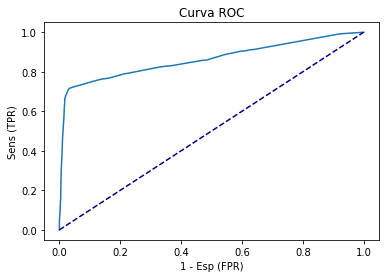

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

secondelement=udf(lambda v:float(v[1]),FloatType())
pred2=pred.withColumn('probs',secondelement('probability'))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import seaborn as sns

pd5 = pred2.sample(False,0.1).select('label2','probs').toPandas()

fpr, tpr, _ = roc_curve( pd5['label2'], pd5['probs'])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('1 - Esp (FPR)')
plt.ylabel('Sens (TPR)')
plt.title('Curva ROC')
plt.show()

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator as BCE

evaluator = BCE(metricName="areaUnderROC", labelCol="label2", rawPredictionCol='probability')

auc = evaluator.evaluate(pred)

print('AUC=', auc)


AUC= 0.8626679186812508


### Final Insights

Here are insights based on the confusion matrix and metrics:

Confusion Matrix:
True Negative (TN): 1,547,036 flights were correctly predicted as not delayed.
False Positive (FP): 53,062 flights were incorrectly predicted as delayed.
False Negative (FN): 129,194 flights were incorrectly predicted as not delayed.
True Positive (TP): 329,116 flights were correctly predicted as delayed.

Metrics:
Prevalence:The prevalence of delayed flights in the dataset is 22%. This means that 22% of the flights in the dataset are actually delayed.
Sensitivity (Recall): The model correctly identifies 72% of the delayed flights. This is the proportion of true positives among all actual positives.
Specificity (Especificity):The model correctly identifies 97% of the flights that are not delayed. This is the proportion of true negatives among all actual negatives.
Precision (Positive Predictive Value - PPV):Among the flights predicted as delayed by the model, 86% are actually delayed.
Accuracy:The overall accuracy of the model is 91%, which is the proportion of correct predictions (both delayed and not delayed) among all predictions.

Insights:
- The model performs well in terms of accuracy (91%), indicating that it correctly predicts whether a flight is delayed or not in the majority of cases.
- The model has a high specificity (97%), suggesting that it is effective at identifying flights that are not delayed. This is crucial for minimizing false alarms and ensuring that non-delayed flights are correctly identified.
- The sensitivity (recall) is 72%, indicating that the model captures a significant portion of delayed flights. However, there is room for improvement in identifying more delayed flights, as some are still being missed (false negatives).
- The precision is 86%, meaning that when the model predicts a flight as delayed, it is correct 86% of the time. This is important for users who want to rely on the model predictions for making decisions about potential delays.

Overall, the model appears to be a solid performer, but further optimization may be possible, especially in improving sensitivity to capture more delayed flights.